In [17]:
getNamespaceVersion('rlang')

ERROR: Error in loadNamespace(name): there is no package called ‘rlang’


In [14]:
remove.packages("rlang")

Removing package from ‘/opt/conda/lib/R/library’
(as ‘lib’ is unspecified)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [18]:
install.packages("rlang")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [16]:
update.packages(oldPkgs = "rlang")

In [13]:
devtools::unload("rlang")

Warning message in get(Info[i, 1], envir = env):
“internal error -3 in R_decompress1”


ERROR: Error in get(Info[i, 1], envir = env): lazy-load database '/opt/conda/lib/R/library/rlang/R/rlang.rdb' is corrupt


In [3]:
install.packages("bigrquery")

also installing the dependencies ‘curl’, ‘cli’, ‘tzdb’, ‘vctrs’, ‘cpp11’, ‘httr’, ‘clock’, ‘gargle’, ‘rlang’, ‘rapidjsonr’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [4]:
# Restart the Kernel

In [6]:
install.packages("tidyverse")

also installing the dependencies ‘pillar’, ‘tibble’, ‘tidyselect’, ‘scales’, ‘timechange’, ‘broom’, ‘conflicted’, ‘dbplyr’, ‘dplyr’, ‘forcats’, ‘ggplot2’, ‘jsonlite’, ‘lubridate’, ‘modelr’, ‘purrr’, ‘ragg’, ‘readr’, ‘readxl’, ‘stringr’, ‘tidyr’


Warning message in install.packages("tidyverse"):
“installation of package ‘ragg’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
library(DBI)
library(stringr)

In [3]:
con <- dbConnect(
  bigrquery::bigquery(),
  project = "cal-itp-data-infra" ,
  dataset = "mart_gtfs" #,
#  billing = "billing"
  )

In [19]:
query1 = "with cte1 as(
  select distinct gtfs_dataset_key
  from `cal-itp-data-infra.mart_transit_database.dim_gtfs_service_data`
  where _is_current is true
  and customer_facing is true
)
SELECT 
dt, 
_extract_ts,
vpm.gtfs_dataset_key,
_header_message_age, 
_vehicle_message_age,
_vehicle_message_age_vs_header

from `cal-itp-data-infra.mart_gtfs.fct_vehicle_positions_messages` vpm
inner join cte1 c1
on vpm.gtfs_dataset_key = c1.gtfs_dataset_key
and gtfs_dataset_name not like 'Bay Area 511%'
and dt between '2024-06-09' and '2024-06-15'
and trip_id is not null
"

In [20]:
df1 = dbGetQuery(con, query1)

ERROR: [1m[33mError[39m:[22m
[1m[22m[33m![39m Request had invalid authentication credentials. Expected OAuth 2
  access token, login cookie or other valid authentication credential. See
  https://developers.google.com/identity/sign-in/web/devconsole-project.
  [authError]


In [7]:
query2 = "with cte1 as(
  select distinct gtfs_dataset_key
  from `cal-itp-data-infra.mart_transit_database.dim_gtfs_service_data`
  where _is_current is true
  and customer_facing is true
),
cte2 as(
SELECT *
from `cal-itp-data-infra.mart_gtfs.fct_vehicle_positions_messages` vpm
inner join cte1 c1
on vpm.gtfs_dataset_key = c1.gtfs_dataset_key
and gtfs_dataset_name not like 'Bay Area 511%'
and dt between '2024-06-09' and '2024-06-15'
and trip_id is not null
),
cte3 as(
select distinct
dt, 
_header_message_age, 
_vehicle_message_age,
_vehicle_message_age_vs_header
from cte2
)
select *,
 PERCENTILE_CONT(_vehicle_message_age, .5) OVER(PARTITION BY dt) AS median_vehicle_message_age
 from cte3"

In [8]:
df2 = dbGetQuery(con, query2)

In [9]:
df2

dt,_header_message_age,_vehicle_message_age,_vehicle_message_age_vs_header,median_vehicle_message_age
<date>,<int>,<int>,<int>,<dbl>
2024-06-09,8,37,29,25318
2024-06-09,18,67,49,25318
2024-06-09,6,60,54,25318
2024-06-09,19,80,61,25318
2024-06-09,13,66,53,25318
2024-06-09,6,96,90,25318
2024-06-09,32,26,-6,25318
2024-06-09,14,5,-9,25318
2024-06-09,8,183,175,25318


In [24]:
df21 = df2 %>%
    select(Date = dt, `Median Vehicle Message Age` = median_vehicle_message_age) %>%
    distinct() %>%
    arrange(Date)
df21

Date,Median Vehicle Message Age
<date>,<dbl>
2024-06-09,25318.0
2024-06-10,25401.0
2024-06-11,94670.0
2024-06-12,171949.5
2024-06-13,78718.0
2024-06-14,3617.5
2024-06-15,3789.0


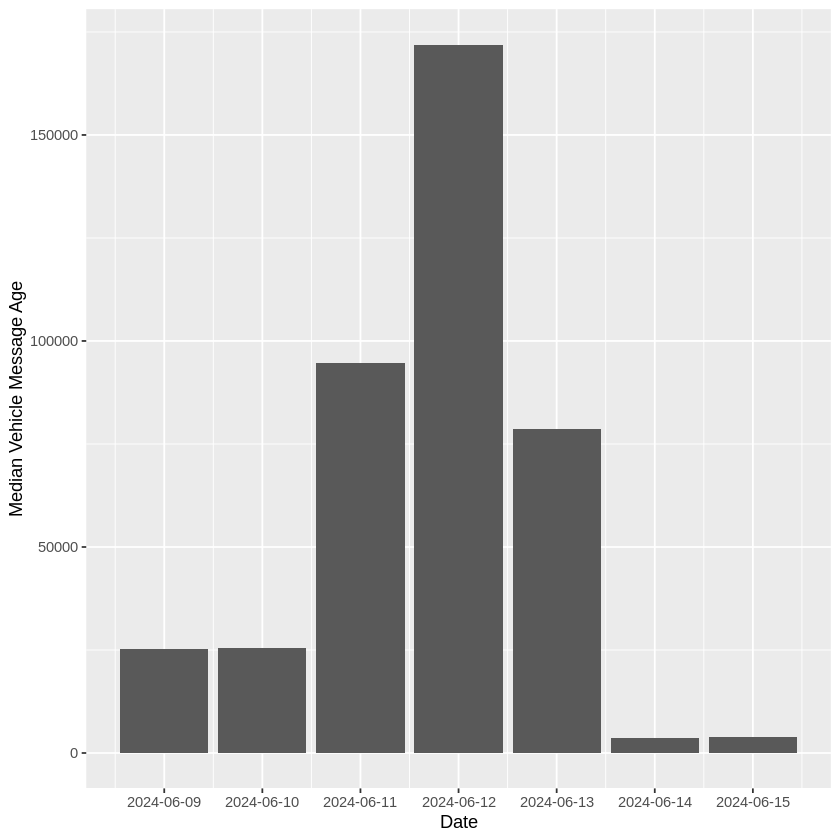

In [25]:
df21 %>% 
    ggplot(aes(Date, `Median Vehicle Message Age`)) +
    geom_bar(stat = 'identity') +
    scale_x_date(breaks = df21$Date)
           
           

In [26]:
summary(df21)

      Date            Median Vehicle Message Age
 Min.   :2024-06-09   Min.   :  3618            
 1st Qu.:2024-06-10   1st Qu.: 14554            
 Median :2024-06-12   Median : 25401            
 Mean   :2024-06-12   Mean   : 57638            
 3rd Qu.:2024-06-13   3rd Qu.: 86694            
 Max.   :2024-06-15   Max.   :171950            

In [27]:
glimpse(df21)

Rows: 7
Columns: 2
$ Date                         <date> 2024-06-09, 2024-06-10, 2024-06-11, 2024…
$ `Median Vehicle Message Age` <dbl> 25318.0, 25401.0, 94670.0, 171949.5, 7871…


In [14]:
glimpse(df2)

Rows: 665,406
Columns: 5
$ dt                               <date> 2024-06-09, 2024-06-09, 2024-06-09, …
$ `_header_message_age`            <int> 8, 18, 6, 19, 13, 6, 32, 14, 8, 8, 9,…
$ `_vehicle_message_age`           <int> 37, 67, 60, 80, 66, 96, 26, 5, 183, 1…
$ `_vehicle_message_age_vs_header` <int> 29, 49, 54, 61, 53, 90, -6, -9, 175, …
$ median_vehicle_message_age       <dbl> 25318, 25318, 25318, 25318, 25318, 25…


In [22]:
query3 = "with cte1 as(
  select distinct gtfs_dataset_key
  from `cal-itp-data-infra.mart_transit_database.dim_gtfs_service_data`
  where _is_current is true
  and customer_facing is true
),
cte2 as(
SELECT 
dt, 
_extract_ts,
_header_message_age, 
_vehicle_message_age,
_vehicle_message_age_vs_header

from `cal-itp-data-infra.mart_gtfs.fct_vehicle_positions_messages` vpm
inner join cte1 c1
on vpm.gtfs_dataset_key = c1.gtfs_dataset_key
and gtfs_dataset_name not like 'Bay Area 511%'
and dt between '2024-06-09' and '2024-06-15'
and trip_id is not null
),
cte21 as(
select *,
case
  when time(_extract_ts) between '07:30:00' and '08:30:00' then 'AM Peak'
  when time(_extract_ts) between '12:00:00' and '13:00:00' then 'Midday'
  when time(_extract_ts) between '16:00:00' and '17:00:00' then 'PM Peak'
  when time(_extract_ts) between '21:00:00' and '22:00:00' then 'Evening'
  else null
end as time_of_day
from cte2
),
cte3 as(
select distinct
dt, 
time_of_day,
_header_message_age, 
_vehicle_message_age,
_vehicle_message_age_vs_header
from cte21
),
cte4 as(
select *,
  PERCENTILE_CONT(_vehicle_message_age, .5) OVER(PARTITION BY dt, time_of_day) AS median_vehicle_message_age
from cte3
)

select distinct dt, time_of_day, median_vehicle_message_age
from cte4
where time_of_day is not null
order by dt, time_of_day "

In [23]:
df3 = dbGetQuery(con, query3)

Auto-refreshing stale OAuth token.



In [28]:
summary(df3)

       dt             time_of_day        median_vehicle_message_age
 Min.   :2024-06-09   Length:28          Min.   :   168.0          
 1st Qu.:2024-06-10   Class :character   1st Qu.:   251.4          
 Median :2024-06-12   Mode  :character   Median :   427.0          
 Mean   :2024-06-12                      Mean   :  7670.1          
 3rd Qu.:2024-06-14                      3rd Qu.:   530.2          
 Max.   :2024-06-15                      Max.   :106523.0          

In [29]:
glimpse(df3)

Rows: 28
Columns: 3
$ dt                         <date> 2024-06-09, 2024-06-09, 2024-06-09, 2024-0…
$ time_of_day                <chr> "AM Peak", "Evening", "Midday", "PM Peak", …
$ median_vehicle_message_age <dbl> 485.0, 260.0, 262.0, 211.0, 20908.0, 470.0,…


In [54]:
factor_level = c("AM Peak", "Midday", "PM Peak", "Evening")
df3 = df3 %>% 
    select(Date = dt, `Time of Day` = factor(time_of_day, levels = factor_level), `Median Vehicle Message Age` = median_vehicle_message_age) %>%
    arrange(Date, `Time of Day`)

In [59]:
df3

Date,Time of Day,Median Vehicle Message Age
<date>,<fct>,<dbl>
2024-06-09,AM Peak,485.0
2024-06-09,Midday,262.0
2024-06-09,PM Peak,211.0
2024-06-09,Evening,260.0
2024-06-10,AM Peak,20908.0
2024-06-10,Midday,555.0
2024-06-10,PM Peak,518.0
2024-06-10,Evening,470.0
2024-06-11,AM Peak,106523.0


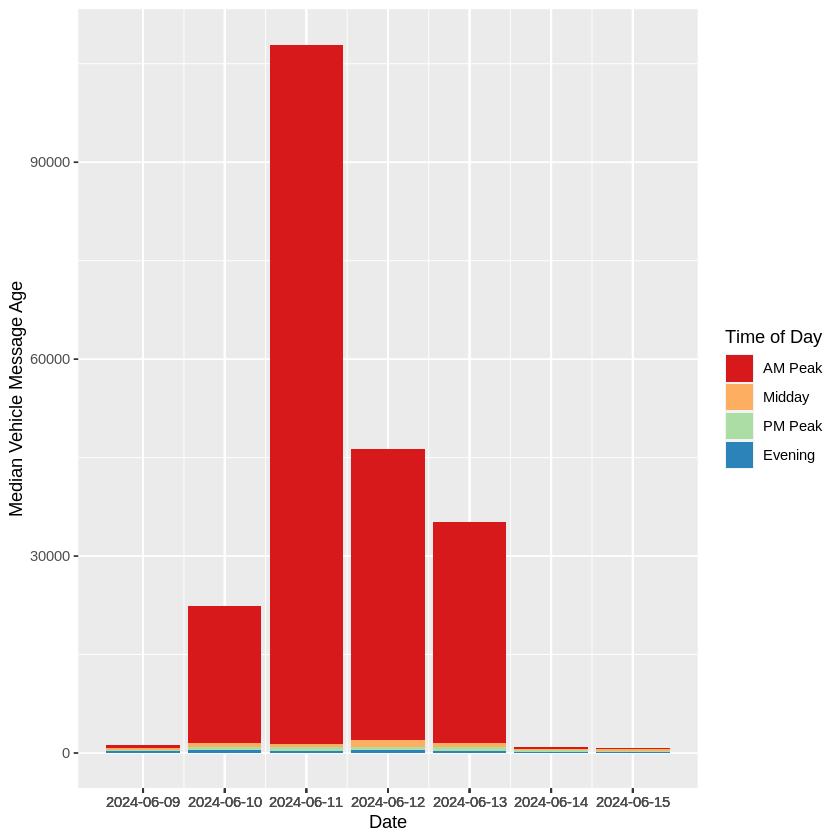

In [70]:
df3 %>% 
    ggplot(aes(Date, `Median Vehicle Message Age`)) +
    geom_bar(aes(fill = `Time of Day`), stat = 'identity') +
    scale_x_date(breaks = df3$Date) +
    labs(fill='Time of Day') +
    scale_fill_brewer(palette="Spectral")


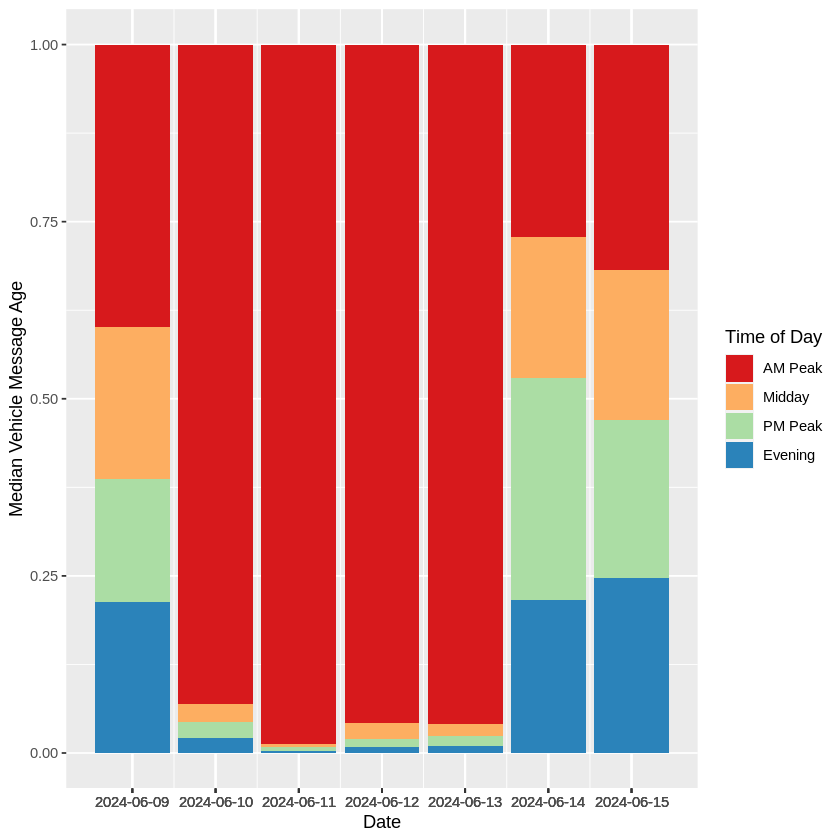

In [69]:
df3 %>% 
    ggplot(aes(Date, `Median Vehicle Message Age`)) +
    geom_bar(aes(fill = `Time of Day`), stat = 'identity', position = "fill") +
    scale_x_date(breaks = df3$Date) +
    labs(fill='Time of Day') +
    scale_fill_brewer(palette="Spectral")


In [72]:
query4 = "with cte1 as(
  select distinct gtfs_dataset_key
  from `cal-itp-data-infra.mart_transit_database.dim_gtfs_service_data`
  where _is_current is true
  and customer_facing is true
),
cte2 as(
SELECT 
vpm.gtfs_dataset_name, 
_header_message_age, 
_vehicle_message_age,
_vehicle_message_age_vs_header

from `cal-itp-data-infra.mart_gtfs.fct_vehicle_positions_messages` vpm
inner join cte1 c1
on vpm.gtfs_dataset_key = c1.gtfs_dataset_key
and gtfs_dataset_name not like 'Bay Area 511%'
and dt = '2024-06-11' 
and _extract_ts between '2024-06-11 07:30:00' and '2024-06-11 08:30:00'
and trip_id is not null
),
cte3 as(
select distinct
gtfs_dataset_name,
_header_message_age, 
_vehicle_message_age,
_vehicle_message_age_vs_header
from cte2
),
cte4 as(
select *,
  PERCENTILE_CONT(_vehicle_message_age, .5) OVER(PARTITION BY gtfs_dataset_name) AS median_vehicle_message_age
from cte3
)

select distinct gtfs_dataset_name, median_vehicle_message_age
from cte4
where median_vehicle_message_age is not null
order by median_vehicle_message_age"
df4 = dbGetQuery(con, query4)
df4

Auto-refreshing stale OAuth token.



gtfs_dataset_name,median_vehicle_message_age
<chr>,<dbl>
Emery Go-Round TripShot Vehicle Positions,1.0
BruinBus Vehicle Positions,1.0
Santa Maria Vehicle Positions,1.5
TCRTA Vehicle Positions,1.5
Anaheim Resort VehiclePositions,2.0
Yolobus Vehicle Positions,7.5
OCTA VehiclePositions,10.0
Bear Vehicle Positions,21.0
Foothill Vehicle Positions,24.0


In [75]:
df4 = df4 %>% select(`GTFS Feed Name` = gtfs_dataset_name, `Median Vehicle Message Age` = median_vehicle_message_age)
df4

GTFS Feed Name,Median Vehicle Message Age
<chr>,<dbl>
Emery Go-Round TripShot Vehicle Positions,1.0
BruinBus Vehicle Positions,1.0
Santa Maria Vehicle Positions,1.5
TCRTA Vehicle Positions,1.5
Anaheim Resort VehiclePositions,2.0
Yolobus Vehicle Positions,7.5
OCTA VehiclePositions,10.0
Bear Vehicle Positions,21.0
Foothill Vehicle Positions,24.0


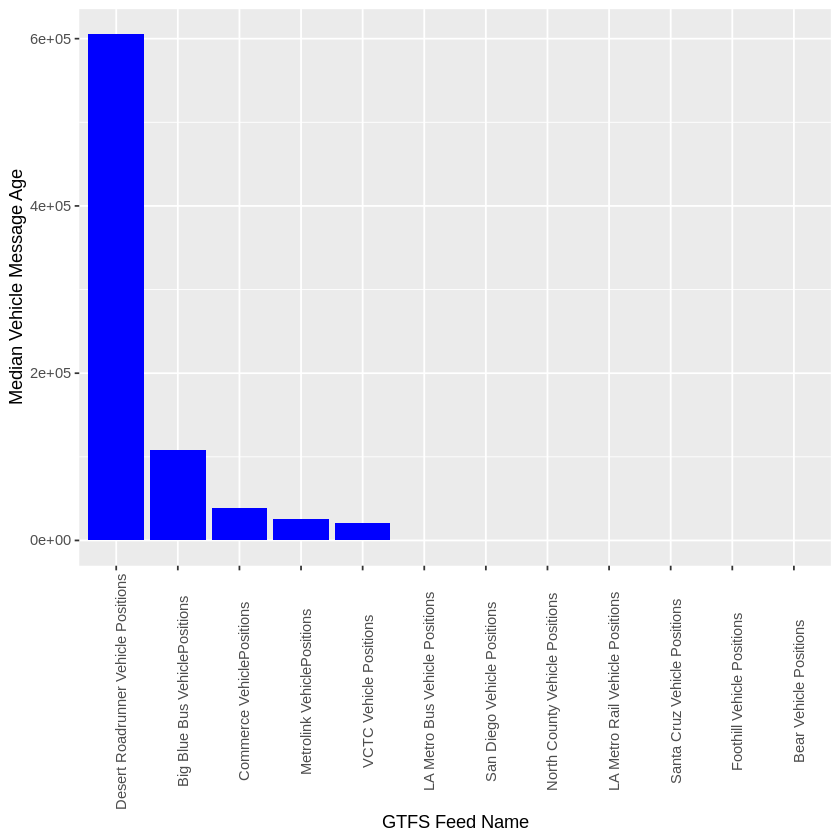

In [105]:
df4[df4$`Median Vehicle Message Age`> 20, ] %>% 
    ggplot(aes(reorder(`GTFS Feed Name`, -`Median Vehicle Message Age`), `Median Vehicle Message Age`)) +
    geom_bar(stat = 'identity', fill = "blue") +
    xlab("GTFS Feed Name") +
    theme(axis.text.x = element_text(angle = 90)) 
#    scale_x_date(breaks = df4$`GTFS Feed Name`) #+
#    scale_fill_brewer(palette="Spectral")

In [117]:
df5 = df4
df5$`GTFS Feed Name`= df5$`GTFS Feed Name` %>% str_replace(" Vehicle Position", "")
df5$`GTFS Feed Name`= df5$`GTFS Feed Name` %>% str_replace(" VehiclePosition", "")

df5

GTFS Feed Name,Median Vehicle Message Age
<chr>,<dbl>
Emery Go-Round TripShots,1.0
BruinBuss,1.0
Santa Marias,1.5
TCRTAs,1.5
Anaheim Resorts,2.0
Yolobuss,7.5
OCTAs,10.0
Bears,21.0
Foothills,24.0


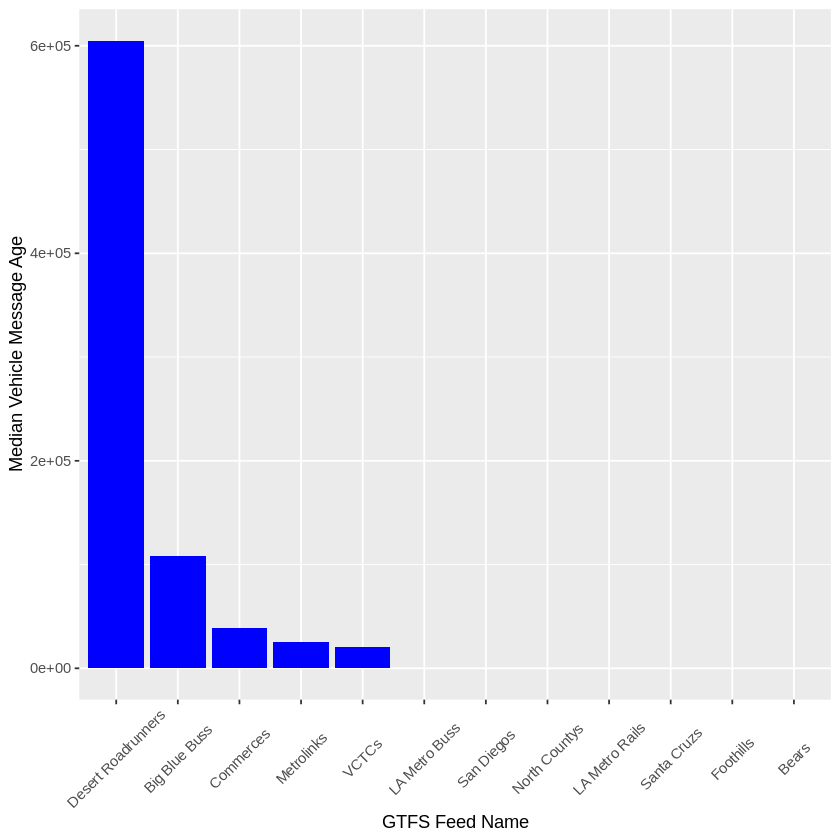

In [119]:
df5[df5$`Median Vehicle Message Age`> 20, ] %>% 
    ggplot(aes(reorder(`GTFS Feed Name`, -`Median Vehicle Message Age`), `Median Vehicle Message Age`)) +
    geom_bar(stat = 'identity', fill = "blue") +
    xlab("GTFS Feed Name") +
    # theme(axis.text.x = element_text(angle = 90)) 
   theme(axis.text.x = element_text(angle = 45, vjust=0.5)) 
#    scale_fill_brewer(palette="Spectral")

In [120]:
query6 = "with cte1 as(
  select distinct gtfs_dataset_key
  from `cal-itp-data-infra.mart_transit_database.dim_gtfs_service_data`
  where _is_current is true
  and customer_facing is true
),
cte2 as(
SELECT 
vpm.gtfs_dataset_name, 
_header_message_age, 
_vehicle_message_age,
_vehicle_message_age_vs_header

from `cal-itp-data-infra.mart_gtfs.fct_vehicle_positions_messages` vpm
inner join cte1 c1
on vpm.gtfs_dataset_key = c1.gtfs_dataset_key
and gtfs_dataset_name not like 'Bay Area 511%'
and dt = '2024-06-11' 
and _extract_ts between '2024-06-11 07:30:00' and '2024-06-11 08:30:00'
and trip_id is not null
)

SELECT distinct gtfs_dataset_name
from cte2
"
df6 = dbGetQuery(con, query6)
df6

Auto-refreshing stale OAuth token.



gtfs_dataset_name
<chr>
VCTC Vehicle Positions
LA Metro Rail Vehicle Positions
Foothill Vehicle Positions
LA Metro Bus Vehicle Positions
San Diego Vehicle Positions
TCRTA Vehicle Positions
Yolobus Vehicle Positions
Anaheim Resort VehiclePositions
Santa Maria Vehicle Positions


In [121]:
query7 = "with cte1 as(
  select distinct gtfs_dataset_key
  from `cal-itp-data-infra.mart_transit_database.dim_gtfs_service_data`
  where _is_current is true
  and customer_facing is true
),
cte2 as(
SELECT 
vpm.gtfs_dataset_name, 
_header_message_age, 
_vehicle_message_age,
_vehicle_message_age_vs_header

from `cal-itp-data-infra.mart_gtfs.fct_vehicle_positions_messages` vpm
inner join cte1 c1
on vpm.gtfs_dataset_key = c1.gtfs_dataset_key
and gtfs_dataset_name not like 'Bay Area 511%'
and dt = '2024-06-11' 
#and _extract_ts between '2024-06-11 07:30:00' and '2024-06-11 08:30:00'
and trip_id is not null
)
SELECT distinct gtfs_dataset_name
from cte2"
df7 = dbGetQuery(con, query7)
df7

gtfs_dataset_name
<chr>
Montebello Vehicle Positions
Turlock Vehicle Positions
BruinBus Vehicle Positions
Desert Roadrunner Vehicle Positions
Metrolink VehiclePositions
Culver City VehiclePositions
LA DOT VehiclePositions
SLORTA VehiclePositions
Santa Maria Vehicle Positions


In [13]:
query8 = "SELECT organization_name, gtfs_dataset_name
FROM `cal-itp-data-infra.mart_transit_database.bridge_organizations_x_gtfs_datasets_produced` 
where _is_current is true
"
df8 = dbGetQuery(con, query8)
df8 

Auto-refreshing stale OAuth token.



organization_name,gtfs_dataset_name
<chr>,<chr>
City of Turlock,Turlock Flex
City of Turlock,Stanislaus Schedule Historic
City of Norwalk,Norwalk Schedule Historic
Santa Barbara Metropolitan Transit District,SBMTD Alerts
Santa Barbara Metropolitan Transit District,SBMTD Schedule
Santa Barbara Metropolitan Transit District,SBMTD VehiclePositions
Santa Barbara Metropolitan Transit District,SBMTD TripUpdates
Lassen Transit Service Agency,Lassen Flex
City of Tracy,Tracy Flex


In [126]:
df4 %>% 
    inner_join(df8, by = c("GTFS Feed Name" = "gtfs_dataset_name")) %>% 
    arrange(`GTFS Feed Name`)

GTFS Feed Name,Median Vehicle Message Age,organization_name
<chr>,<dbl>,<chr>
Anaheim Resort VehiclePositions,2.0,Anaheim Transportation Network
Anaheim Resort VehiclePositions,2.0,TripShot Inc.
Bear Vehicle Positions,21.0,Cubic
Big Blue Bus VehiclePositions,107983.0,Swiftly Inc.
Big Blue Bus VehiclePositions,107983.0,City of Santa Monica
BruinBus Vehicle Positions,1.0,TripShot Inc.
Commerce VehiclePositions,39216.0,GMV Syncromatics Inc
Commerce VehiclePositions,39216.0,City of Commerce
Desert Roadrunner Vehicle Positions,605069.5,Palo Verde Valley Transit Agency


In [132]:
df4 %>% 
    inner_join(df8, by = c("GTFS Feed Name" = "gtfs_dataset_name")) %>% 
    select(organization_name, `Median Vehicle Message Age`) %>%  
    arrange(`Median Vehicle Message Age`)

organization_name,Median Vehicle Message Age
<chr>,<dbl>
TripShot Inc.,1.0
TripShot Inc.,1.0
TripShot Inc.,1.5
TripShot Inc.,1.5
Anaheim Transportation Network,2.0
TripShot Inc.,2.0
Yolo County Transportation District,7.5
Swiftly Inc.,10.0
Cubic,21.0


In [127]:
query9 = "with cte1 as(
  select distinct gtfs_dataset_key
  from `cal-itp-data-infra.mart_transit_database.dim_gtfs_service_data`
  where _is_current is true
  and customer_facing is true
),
cte2 as(
SELECT 
vpm.gtfs_dataset_name, 
_header_message_age, 
_vehicle_message_age
from `cal-itp-data-infra.mart_gtfs.fct_vehicle_positions_messages` vpm
inner join cte1 c1
on vpm.gtfs_dataset_key = c1.gtfs_dataset_key
and gtfs_dataset_name not like 'Bay Area 511%'
and dt = '2024-06-11' 
and _extract_ts between '2024-06-11 07:30:00' and '2024-06-11 08:30:00'
and trip_id is not null
),
cte21 as(
  select
  organization_name,
  _header_message_age, 
  _vehicle_message_age
  from cte2 c2
  inner join `cal-itp-data-infra.mart_transit_database.bridge_organizations_x_gtfs_datasets_produced` bo
  on c2.gtfs_dataset_name = bo.gtfs_dataset_name
  where _is_current is true
),
cte3 as(
select distinct
organization_name,
_header_message_age, 
_vehicle_message_age
from cte21
),
cte4 as(
select *,
  PERCENTILE_CONT(_vehicle_message_age, .5) OVER(PARTITION BY organization_name) AS median_vehicle_message_age
from cte3
),
cte5 as(
select distinct organization_name, median_vehicle_message_age
from cte4
where median_vehicle_message_age is not null
order by median_vehicle_message_age 
)

select * from cte5"
df9 = dbGetQuery(con, query9)
df9 

Auto-refreshing stale OAuth token.



organization_name,median_vehicle_message_age
<chr>,<dbl>
TripShot Inc.,1.5
Anaheim Transportation Network,2.0
Yolo County Transportation District,7.5
Cubic,21.0
Avail Technologies Inc.,24.0
Clever Devices Ltd.,25.0
San Diego Metropolitan Transit System,86.5
GMV Syncromatics Inc,20562.0
Southern California Regional Rail Authority,25399.0


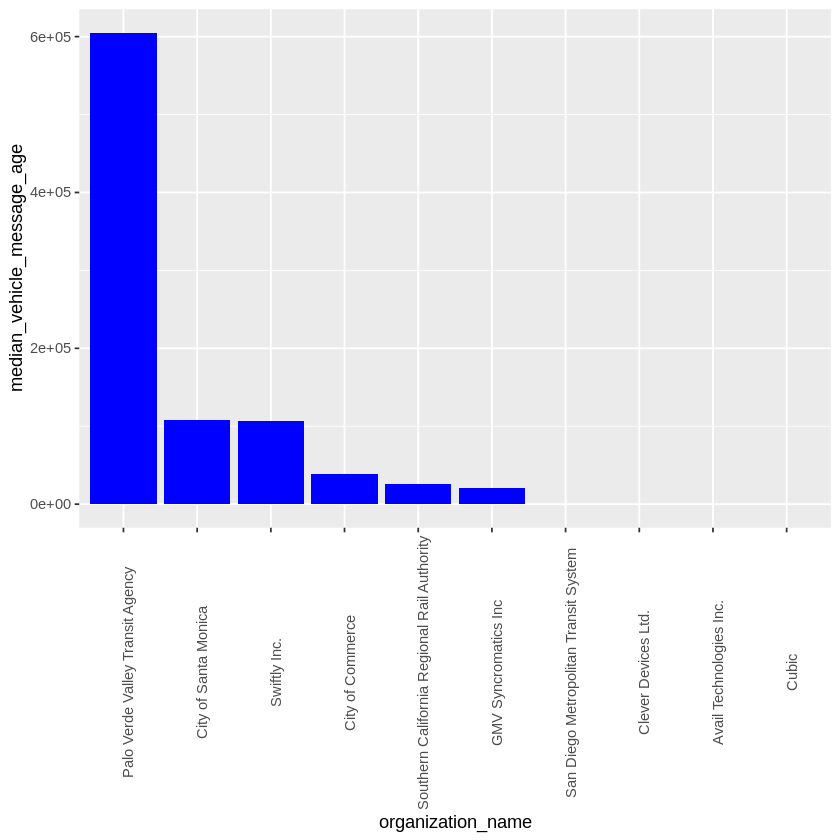

In [129]:
df9[df9$median_vehicle_message_age> 20, ] %>% 
    ggplot(aes(reorder(organization_name, -median_vehicle_message_age), median_vehicle_message_age)) +
    geom_bar(stat = 'identity', fill = "blue") +
    xlab("organization_name") +
    theme(axis.text.x = element_text(angle = 90)) 
    #theme(axis.text.x = element_text(angle = 45, vjust=0.5)) 

In [133]:
query10 = "with cte1 as(
  select distinct gtfs_dataset_key
  from `cal-itp-data-infra.mart_transit_database.dim_gtfs_service_data`
  where _is_current is true
  and customer_facing is true
),
cte2 as(
SELECT 
schedule_feed_key, 
_header_message_age, 
_vehicle_message_age
from `cal-itp-data-infra.mart_gtfs.fct_vehicle_positions_messages` vpm
inner join cte1 c1
on vpm.gtfs_dataset_key = c1.gtfs_dataset_key
and gtfs_dataset_name not like 'Bay Area 511%'
and dt = '2024-06-11' 
and _extract_ts between '2024-06-11 07:30:00' and '2024-06-11 08:30:00'
and trip_id is not null
),
cte21 as(
SELECT distinct sf.key, route_type
FROM `cal-itp-data-infra.mart_gtfs.dim_trips` t
inner join `cal-itp-data-infra.mart_gtfs.dim_routes` r
on t.feed_key = r.feed_key
and t.route_id = r.route_id
inner join `cal-itp-data-infra.mart_gtfs.dim_schedule_feeds` sf
on t.base64_url = sf.base64_url
where _is_current is true
),
cte22 as(
  select
  route_type,
  _header_message_age, 
  _vehicle_message_age
  from cte2 c2
  inner join cte21 c21
  on c2.schedule_feed_key = c21.key
),
cte3 as(
select distinct
route_type,
_header_message_age, 
_vehicle_message_age
from cte22
),
cte4 as(
select *,
  PERCENTILE_CONT(_vehicle_message_age, .5) OVER(PARTITION BY route_type) AS median_vehicle_message_age
from cte3
),
cte5 as(
select distinct route_type, median_vehicle_message_age
from cte4
where median_vehicle_message_age is not null
order by median_vehicle_message_age 
)

select * from cte5"
df10 = dbGetQuery(con, query10)
df10 

Auto-refreshing stale OAuth token.



route_type,median_vehicle_message_age
<chr>,<dbl>
0,86.0
4,86.5
2,25347.0
3,107004.0


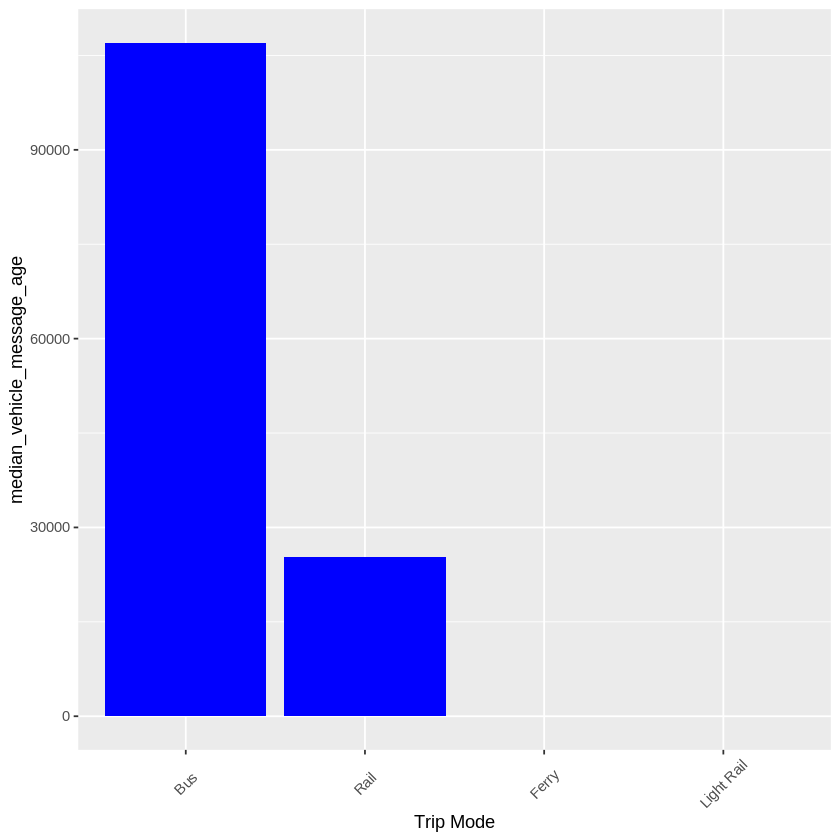

In [137]:
df10 %>% 
    mutate(`Trip Mode` = c("Light Rail", "Ferry", "Rail", "Bus")) %>% 
    ggplot(aes(reorder(`Trip Mode`, -median_vehicle_message_age), median_vehicle_message_age)) +
    geom_bar(stat = 'identity', fill = "blue") +
    xlab("Trip Mode") +
    #theme(axis.text.x = element_text(angle = 90)) 
    theme(axis.text.x = element_text(angle = 45, vjust=0.5)) 

In [9]:
query11 = "select *, datetime(_extract_ts, 'America/Los_Angeles') as _extract_ts_pacific, 
date(datetime(_extract_ts, 'America/Los_Angeles')) as dt_pacific,
time(datetime(_extract_ts, 'America/Los_Angeles')) as hour_pacific
from `cal-itp-data-infra.mart_gtfs.fct_vehicle_positions_messages` 
where (dt = '2024-06-11' or dt = '2024-06-12')
and date(datetime(_extract_ts, 'America/Los_Angeles')) = '2024-06-12'
and time(datetime(_extract_ts, 'America/Los_Angeles')) between '00:00:00' and '00:59:59'"
df11 = dbGetQuery(con, query11)
df11 

key,gtfs_dataset_key,dt,hour,base64_url,_extract_ts,_config_extract_ts,gtfs_dataset_name,schedule_gtfs_dataset_key,schedule_base64_url,⋯,trip_start_date,trip_schedule_relationship,position_latitude,position_longitude,position_bearing,position_odometer,position_speed,_extract_ts_pacific,dt_pacific,hour_pacific
<chr>,<chr>,<date>,<dttm>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,⋯,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<date>,<time>
739d9b4371d637c0aaa2daf296f1eed0,5a3ed004c18b1388ecf8f219f5483043,2024-06-12,2024-06-12 07:00:00,aHR0cHM6Ly9hcGkuZ29zd2lmdC5seS9yZWFsLXRpbWUvdG9ycmFuY2UvZ3Rmcy1ydC12ZWhpY2xlLXBvc2l0aW9ucw==,2024-06-12 07:00:00,2024-06-12 02:00:42,Torrance Swiftly Vehicle Positions,7cb3592df114dab1288176f1410563a1,aHR0cHM6Ly90cmFuc2l0LnRvcnJhbmNlY2EuZ292L2hvbWUvc2hvd2RvY3VtZW50P2lkPTE2Njcz,⋯,NA,NA,33.84477,-118.3427,NA,NA,0,2024-06-12 00:00:00,2024-06-12,00:00:00
dda7c0caa13548170bf5ae8e775fb618,5a3ed004c18b1388ecf8f219f5483043,2024-06-12,2024-06-12 07:00:00,aHR0cHM6Ly9hcGkuZ29zd2lmdC5seS9yZWFsLXRpbWUvdG9ycmFuY2UvZ3Rmcy1ydC12ZWhpY2xlLXBvc2l0aW9ucw==,2024-06-12 07:00:00,2024-06-12 02:00:42,Torrance Swiftly Vehicle Positions,7cb3592df114dab1288176f1410563a1,aHR0cHM6Ly90cmFuc2l0LnRvcnJhbmNlY2EuZ292L2hvbWUvc2hvd2RvY3VtZW50P2lkPTE2Njcz,⋯,NA,NA,33.84464,-118.3426,NA,NA,0,2024-06-12 00:00:00,2024-06-12,00:00:00
b3e9149ae3f94f3e7cf005344ff438d8,5a3ed004c18b1388ecf8f219f5483043,2024-06-12,2024-06-12 07:00:00,aHR0cHM6Ly9hcGkuZ29zd2lmdC5seS9yZWFsLXRpbWUvdG9ycmFuY2UvZ3Rmcy1ydC12ZWhpY2xlLXBvc2l0aW9ucw==,2024-06-12 07:00:00,2024-06-12 02:00:42,Torrance Swiftly Vehicle Positions,7cb3592df114dab1288176f1410563a1,aHR0cHM6Ly90cmFuc2l0LnRvcnJhbmNlY2EuZ292L2hvbWUvc2hvd2RvY3VtZW50P2lkPTE2Njcz,⋯,NA,NA,33.84468,-118.3426,NA,NA,0,2024-06-12 00:00:00,2024-06-12,00:00:00
e08a293942c9890e47b5005c200d6f54,5a3ed004c18b1388ecf8f219f5483043,2024-06-12,2024-06-12 07:00:00,aHR0cHM6Ly9hcGkuZ29zd2lmdC5seS9yZWFsLXRpbWUvdG9ycmFuY2UvZ3Rmcy1ydC12ZWhpY2xlLXBvc2l0aW9ucw==,2024-06-12 07:00:20,2024-06-12 02:00:42,Torrance Swiftly Vehicle Positions,7cb3592df114dab1288176f1410563a1,aHR0cHM6Ly90cmFuc2l0LnRvcnJhbmNlY2EuZ292L2hvbWUvc2hvd2RvY3VtZW50P2lkPTE2Njcz,⋯,NA,NA,33.84477,-118.3427,NA,NA,0,2024-06-12 00:00:20,2024-06-12,00:00:20
c8da55b5e1dd4aeebaa9e52fb7a2d491,5a3ed004c18b1388ecf8f219f5483043,2024-06-12,2024-06-12 07:00:00,aHR0cHM6Ly9hcGkuZ29zd2lmdC5seS9yZWFsLXRpbWUvdG9ycmFuY2UvZ3Rmcy1ydC12ZWhpY2xlLXBvc2l0aW9ucw==,2024-06-12 07:00:20,2024-06-12 02:00:42,Torrance Swiftly Vehicle Positions,7cb3592df114dab1288176f1410563a1,aHR0cHM6Ly90cmFuc2l0LnRvcnJhbmNlY2EuZ292L2hvbWUvc2hvd2RvY3VtZW50P2lkPTE2Njcz,⋯,NA,NA,33.84464,-118.3426,NA,NA,0,2024-06-12 00:00:20,2024-06-12,00:00:20
dcbec808081e49364337cd626112e573,5a3ed004c18b1388ecf8f219f5483043,2024-06-12,2024-06-12 07:00:00,aHR0cHM6Ly9hcGkuZ29zd2lmdC5seS9yZWFsLXRpbWUvdG9ycmFuY2UvZ3Rmcy1ydC12ZWhpY2xlLXBvc2l0aW9ucw==,2024-06-12 07:00:20,2024-06-12 02:00:42,Torrance Swiftly Vehicle Positions,7cb3592df114dab1288176f1410563a1,aHR0cHM6Ly90cmFuc2l0LnRvcnJhbmNlY2EuZ292L2hvbWUvc2hvd2RvY3VtZW50P2lkPTE2Njcz,⋯,NA,NA,33.84468,-118.3426,NA,NA,0,2024-06-12 00:00:20,2024-06-12,00:00:20
594f950fea419b97b6ae2ed0f8e6ed02,5a3ed004c18b1388ecf8f219f5483043,2024-06-12,2024-06-12 07:00:00,aHR0cHM6Ly9hcGkuZ29zd2lmdC5seS9yZWFsLXRpbWUvdG9ycmFuY2UvZ3Rmcy1ydC12ZWhpY2xlLXBvc2l0aW9ucw==,2024-06-12 07:00:40,2024-06-12 02:00:42,Torrance Swiftly Vehicle Positions,7cb3592df114dab1288176f1410563a1,aHR0cHM6Ly90cmFuc2l0LnRvcnJhbmNlY2EuZ292L2hvbWUvc2hvd2RvY3VtZW50P2lkPTE2Njcz,⋯,NA,NA,33.84477,-118.3427,NA,NA,0,2024-06-12 00:00:40,2024-06-12,00:00:40
e7f1115e00a1892cc3a7856b3bcbc08a,5a3ed004c18b1388ecf8f219f5483043,2024-06-12,2024-06-12 07:00:00,aHR0cHM6Ly9hcGkuZ29zd2lmdC5seS9yZWFsLXRpbWUvdG9ycmFuY2UvZ3Rmcy1ydC12ZWhpY2xlLXBvc2l0aW9ucw==,2024-06-12 07:00:40,2024-06-12 02:00:42,Torrance Swiftly Vehicle Positions,7cb3592df114dab1288176f1410563a1,aHR0cHM6Ly90cmFuc2l0LnRvcnJhbmNlY2EuZ292L2hvbWUvc2hvd2RvY3VtZW50P2lkPTE2Njcz,⋯,NA,NA,33.84464,-118.3426,NA,NA,0

In [10]:
summary(df11)

     key            gtfs_dataset_key         dt            
 Length:572709      Length:572709      Min.   :2024-06-12  
 Class :character   Class :character   1st Qu.:2024-06-12  
 Mode  :character   Mode  :character   Median :2024-06-12  
                                       Mean   :2024-06-12  
                                       3rd Qu.:2024-06-12  
                                       Max.   :2024-06-12  
                                                           
      hour                      base64_url         _extract_ts                 
 Min.   :2024-06-12 07:00:00   Length:572709      Min.   :2024-06-12 07:00:00  
 1st Qu.:2024-06-12 07:00:00   Class :character   1st Qu.:2024-06-12 07:13:40  
 Median :2024-06-12 07:00:00   Mode  :character   Median :2024-06-12 07:28:00  
 Mean   :2024-06-12 07:00:00                      Mean   :2024-06-12 07:28:38  
 3rd Qu.:2024-06-12 07:00:00                      3rd Qu.:2024-06-12 07:43:20  
 Max.   :2024-06-12 07:00:00            

In [14]:
dim(df11)

[1] 572709     47

In [15]:
query12 = "select *, datetime(_extract_ts, 'America/Los_Angeles') as _extract_ts_pacific, 
date(datetime(_extract_ts, 'America/Los_Angeles')) as dt_pacific,
time(datetime(_extract_ts, 'America/Los_Angeles')) as hour_pacific
from `cal-itp-data-infra.mart_gtfs.fct_vehicle_positions_messages` 
where (dt = '2024-06-11' or dt = '2024-06-12')
and date(datetime(_extract_ts, 'America/Los_Angeles')) = '2024-06-12'
and time(datetime(_extract_ts, 'America/Los_Angeles')) between '01:00:00' and '01:59:59'"
df12 = dbGetQuery(con, query12)
df12 

key,gtfs_dataset_key,dt,hour,base64_url,_extract_ts,_config_extract_ts,gtfs_dataset_name,schedule_gtfs_dataset_key,schedule_base64_url,⋯,trip_start_date,trip_schedule_relationship,position_latitude,position_longitude,position_bearing,position_odometer,position_speed,_extract_ts_pacific,dt_pacific,hour_pacific
<chr>,<chr>,<date>,<dttm>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,⋯,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<date>,<time>
71d7efe1d82860f483e37e4e4e29bcb9,4a484f12beac0f078b837c12e51933d2,2024-06-12,2024-06-12 08:00:00,aHR0cHM6Ly9jaXR5Y29tbWJ1cy5jb20vZ3Rmcy1ydC92ZWhpY2xlcG9zaXRpb25z,2024-06-12 08:00:00,2024-06-12 02:00:42,Commerce VehiclePositions,eaabdf2b0bb899b7953ea81047fdd00d,aHR0cHM6Ly9jaXR5Y29tbWJ1cy5jb20vZ3Rmcw==,⋯,2024-06-11,NA,33.99242,-118.1611,188.2557,NA,0,2024-06-12 01:00:00,2024-06-12,01:00:00
e43d2602df88cf1a4f4cd4d3d07c79e2,4a484f12beac0f078b837c12e51933d2,2024-06-12,2024-06-12 08:00:00,aHR0cHM6Ly9jaXR5Y29tbWJ1cy5jb20vZ3Rmcy1ydC92ZWhpY2xlcG9zaXRpb25z,2024-06-12 08:00:20,2024-06-12 02:00:42,Commerce VehiclePositions,eaabdf2b0bb899b7953ea81047fdd00d,aHR0cHM6Ly9jaXR5Y29tbWJ1cy5jb20vZ3Rmcw==,⋯,2024-06-11,NA,33.99242,-118.1611,188.2557,NA,0,2024-06-12 01:00:20,2024-06-12,01:00:20
a3dea44984bf18f54c62db81e385a119,4a484f12beac0f078b837c12e51933d2,2024-06-12,2024-06-12 08:00:00,aHR0cHM6Ly9jaXR5Y29tbWJ1cy5jb20vZ3Rmcy1ydC92ZWhpY2xlcG9zaXRpb25z,2024-06-12 08:00:40,2024-06-12 02:00:42,Commerce VehiclePositions,eaabdf2b0bb899b7953ea81047fdd00d,aHR0cHM6Ly9jaXR5Y29tbWJ1cy5jb20vZ3Rmcw==,⋯,2024-06-11,NA,33.99242,-118.1611,188.2557,NA,0,2024-06-12 01:00:40,2024-06-12,01:00:40
ff002e9528f0740821e8313a005ab913,4a484f12beac0f078b837c12e51933d2,2024-06-12,2024-06-12 08:00:00,aHR0cHM6Ly9jaXR5Y29tbWJ1cy5jb20vZ3Rmcy1ydC92ZWhpY2xlcG9zaXRpb25z,2024-06-12 08:01:00,2024-06-12 02:00:42,Commerce VehiclePositions,eaabdf2b0bb899b7953ea81047fdd00d,aHR0cHM6Ly9jaXR5Y29tbWJ1cy5jb20vZ3Rmcw==,⋯,2024-06-11,NA,33.99242,-118.1611,188.2557,NA,0,2024-06-12 01:01:00,2024-06-12,01:01:00
ac045b2dc04fe1d0e4d5357c23922f57,4a484f12beac0f078b837c12e51933d2,2024-06-12,2024-06-12 08:00:00,aHR0cHM6Ly9jaXR5Y29tbWJ1cy5jb20vZ3Rmcy1ydC92ZWhpY2xlcG9zaXRpb25z,2024-06-12 08:01:20,2024-06-12 02:00:42,Commerce VehiclePositions,eaabdf2b0bb899b7953ea81047fdd00d,aHR0cHM6Ly9jaXR5Y29tbWJ1cy5jb20vZ3Rmcw==,⋯,2024-06-11,NA,33.99242,-118.1611,188.2557,NA,0,2024-06-12 01:01:20,2024-06-12,01:01:20
1892e5f7467bd3c12b66caee9e894974,4a484f12beac0f078b837c12e51933d2,2024-06-12,2024-06-12 08:00:00,aHR0cHM6Ly9jaXR5Y29tbWJ1cy5jb20vZ3Rmcy1ydC92ZWhpY2xlcG9zaXRpb25z,2024-06-12 08:01:40,2024-06-12 02:00:42,Commerce VehiclePositions,eaabdf2b0bb899b7953ea81047fdd00d,aHR0cHM6Ly9jaXR5Y29tbWJ1cy5jb20vZ3Rmcw==,⋯,2024-06-11,NA,33.99242,-118.1611,188.2557,NA,0,2024-06-12 01:01:40,2024-06-12,01:01:40
273e476b89bbe7eac87581ac0b6cc313,4a484f12beac0f078b837c12e51933d2,2024-06-12,2024-06-12 08:00:00,aHR0cHM6Ly9jaXR5Y29tbWJ1cy5jb20vZ3Rmcy1ydC92ZWhpY2xlcG9zaXRpb25z,2024-06-12 08:02:00,2024-06-12 02:00:42,Commerce VehiclePositions,eaabdf2b0bb899b7953ea81047fdd00d,aHR0cHM6Ly9jaXR5Y29tbWJ1cy5jb20vZ3Rmcw==,⋯,2024-06-11,NA,33.99242,-118.1611,188.2557,NA,0,2024-06-12 01:02:00,2024-06-12,01:02:00
d571994ac1d40e18ecaa52981acde6f8,4a484f12beac0f078b837c12e51933d2,2024-06-12,2024-06-12 08:00:00,aHR0cHM6Ly9jaXR5Y29tbWJ1cy5jb20vZ3Rmcy1ydC92ZWhpY2xlcG9zaXRpb25z,2024-06-12 08:02:20,2024-06-12 02:00:42,Commerce VehiclePositions,eaabdf2b0bb899b7953ea81047fdd00d,aHR0cHM6Ly9jaXR5Y29tbWJ1cy5jb20vZ3Rmcw==,⋯,2024-06-11,NA,33.99242,-118.1611,188.2557,NA,0,2024-06-12 01:02:20,2024-06-12,01:02:20
34075c4046c0740c52e452eb1827e218,4a484f12beac0f078b837c12e51933d2,2024-06-12,2024-06-12 08:00:00,aHR0cHM6Ly9jaXR5Y29tbWJ1cy5jb20vZ3Rmcy1ydC92ZWhpY2xlcG9zaXRpb25z,2024-06-12 08:02:40,2024-06-12 02:00:42,Commerce VehiclePositions,eaabdf2b0bb899b7953ea81047fdd00d,aHR0cHM6Ly9jaXR5Y29tbWJ1cy5jb20vZ3Rmcw==,⋯,2024-06-11,NA,33.99242,-118.1611,188.2557,NA,0,2024-06-12 01:02:40,2024-06-12,01:02:40


In [16]:
dim(df12)

[1] 448037     47

In [17]:
df1112 = bind_rows(df11, df12)

In [18]:
dim(df1112)

[1] 1020746      47

In [21]:
saveRDS(df1112, "data/fct_vehicle_positions_messages.rds")

In [22]:
x = readRDS("data/fct_vehicle_positions_messages.rds")

In [23]:
dim(x)

[1] 1020746      47

In [24]:
glimpse(x)

Rows: 1,020,746
Columns: 47
$ key                              <chr> "739d9b4371d637c0aaa2daf296f1eed0", "…
$ gtfs_dataset_key                 <chr> "5a3ed004c18b1388ecf8f219f5483043", "…
$ dt                               <date> 2024-06-12, 2024-06-12, 2024-06-12, …
$ hour                             <dttm> 2024-06-12 07:00:00, 2024-06-12 07:0…
$ base64_url                       <chr> "aHR0cHM6Ly9hcGkuZ29zd2lmdC5seS9yZWFs…
$ `_extract_ts`                    <dttm> 2024-06-12 07:00:00, 2024-06-12 07:0…
$ `_config_extract_ts`             <dttm> 2024-06-12 02:00:42, 2024-06-12 02:0…
$ gtfs_dataset_name                <chr> "Torrance Swiftly Vehicle Positions",…
$ schedule_gtfs_dataset_key        <chr> "7cb3592df114dab1288176f1410563a1", "…
$ schedule_base64_url              <chr> "aHR0cHM6Ly90cmFuc2l0LnRvcnJhbmNlY2Eu…
$ schedule_name                    <chr> "Torrance Schedule", "Torrance Schedu…
$ schedule_feed_key                <chr> "3eb175018d2ad71b8b6d1c01eb115121", "…
$ schedule_f

In [4]:
x = readRDS("data/fct_vehicle_positions_messages5.rds")

In [5]:
querya = "select *, datetime(_extract_ts, 'America/Los_Angeles') as _extract_ts_pacific, 
date(datetime(_extract_ts, 'America/Los_Angeles')) as dt_pacific,
time(datetime(_extract_ts, 'America/Los_Angeles')) as hour_pacific
from `cal-itp-data-infra.mart_gtfs.fct_vehicle_positions_messages` 
where (dt = '2024-06-11' or dt = '2024-06-12')
and date(datetime(_extract_ts, 'America/Los_Angeles')) = '2024-06-12'
and time(datetime(_extract_ts, 'America/Los_Angeles')) between '"
queryb = ":00:00' and '"
queryc = ":59:59'"

In [6]:
dfr = x

In [7]:
t = c("06", "07", "08", "09", as.character(10:23))

In [9]:
for(i in t){
    print(i)
    query = paste0(querya, i, queryb, i, queryc)
    df = dbGetQuery(con, query)
    dfr = bind_rows(dfr, df)
    print(dim(dfr))
    }

[1] "06"


ERROR: [1m[33mError[39m:[22m
[1m[22m[33m![39m Request had invalid authentication credentials. Expected OAuth 2
  access token, login cookie or other valid authentication credential. See
  https://developers.google.com/identity/sign-in/web/devconsole-project.
  [authError]


In [ ]:
 saveRDS(dfr, "data/fct_vehicle_positions_messages6.rds")

In [ ]:
dfr$hour_pacific

In [1]:
querya

ERROR: Error in eval(expr, envir, enclos): object 'querya' not found


In [2]:
dim(dfr)

ERROR: Error in eval(expr, envir, enclos): object 'dfr' not found


In [5]:
x = readRDS("data/fct_vehicle_positions_messages5.rds")

In [1]:
dim(x)

ERROR: Error in eval(expr, envir, enclos): object 'x' not found


In [2]:
dfr

ERROR: Error in eval(expr, envir, enclos): object 'dfr' not found


In [ ]:
1+1